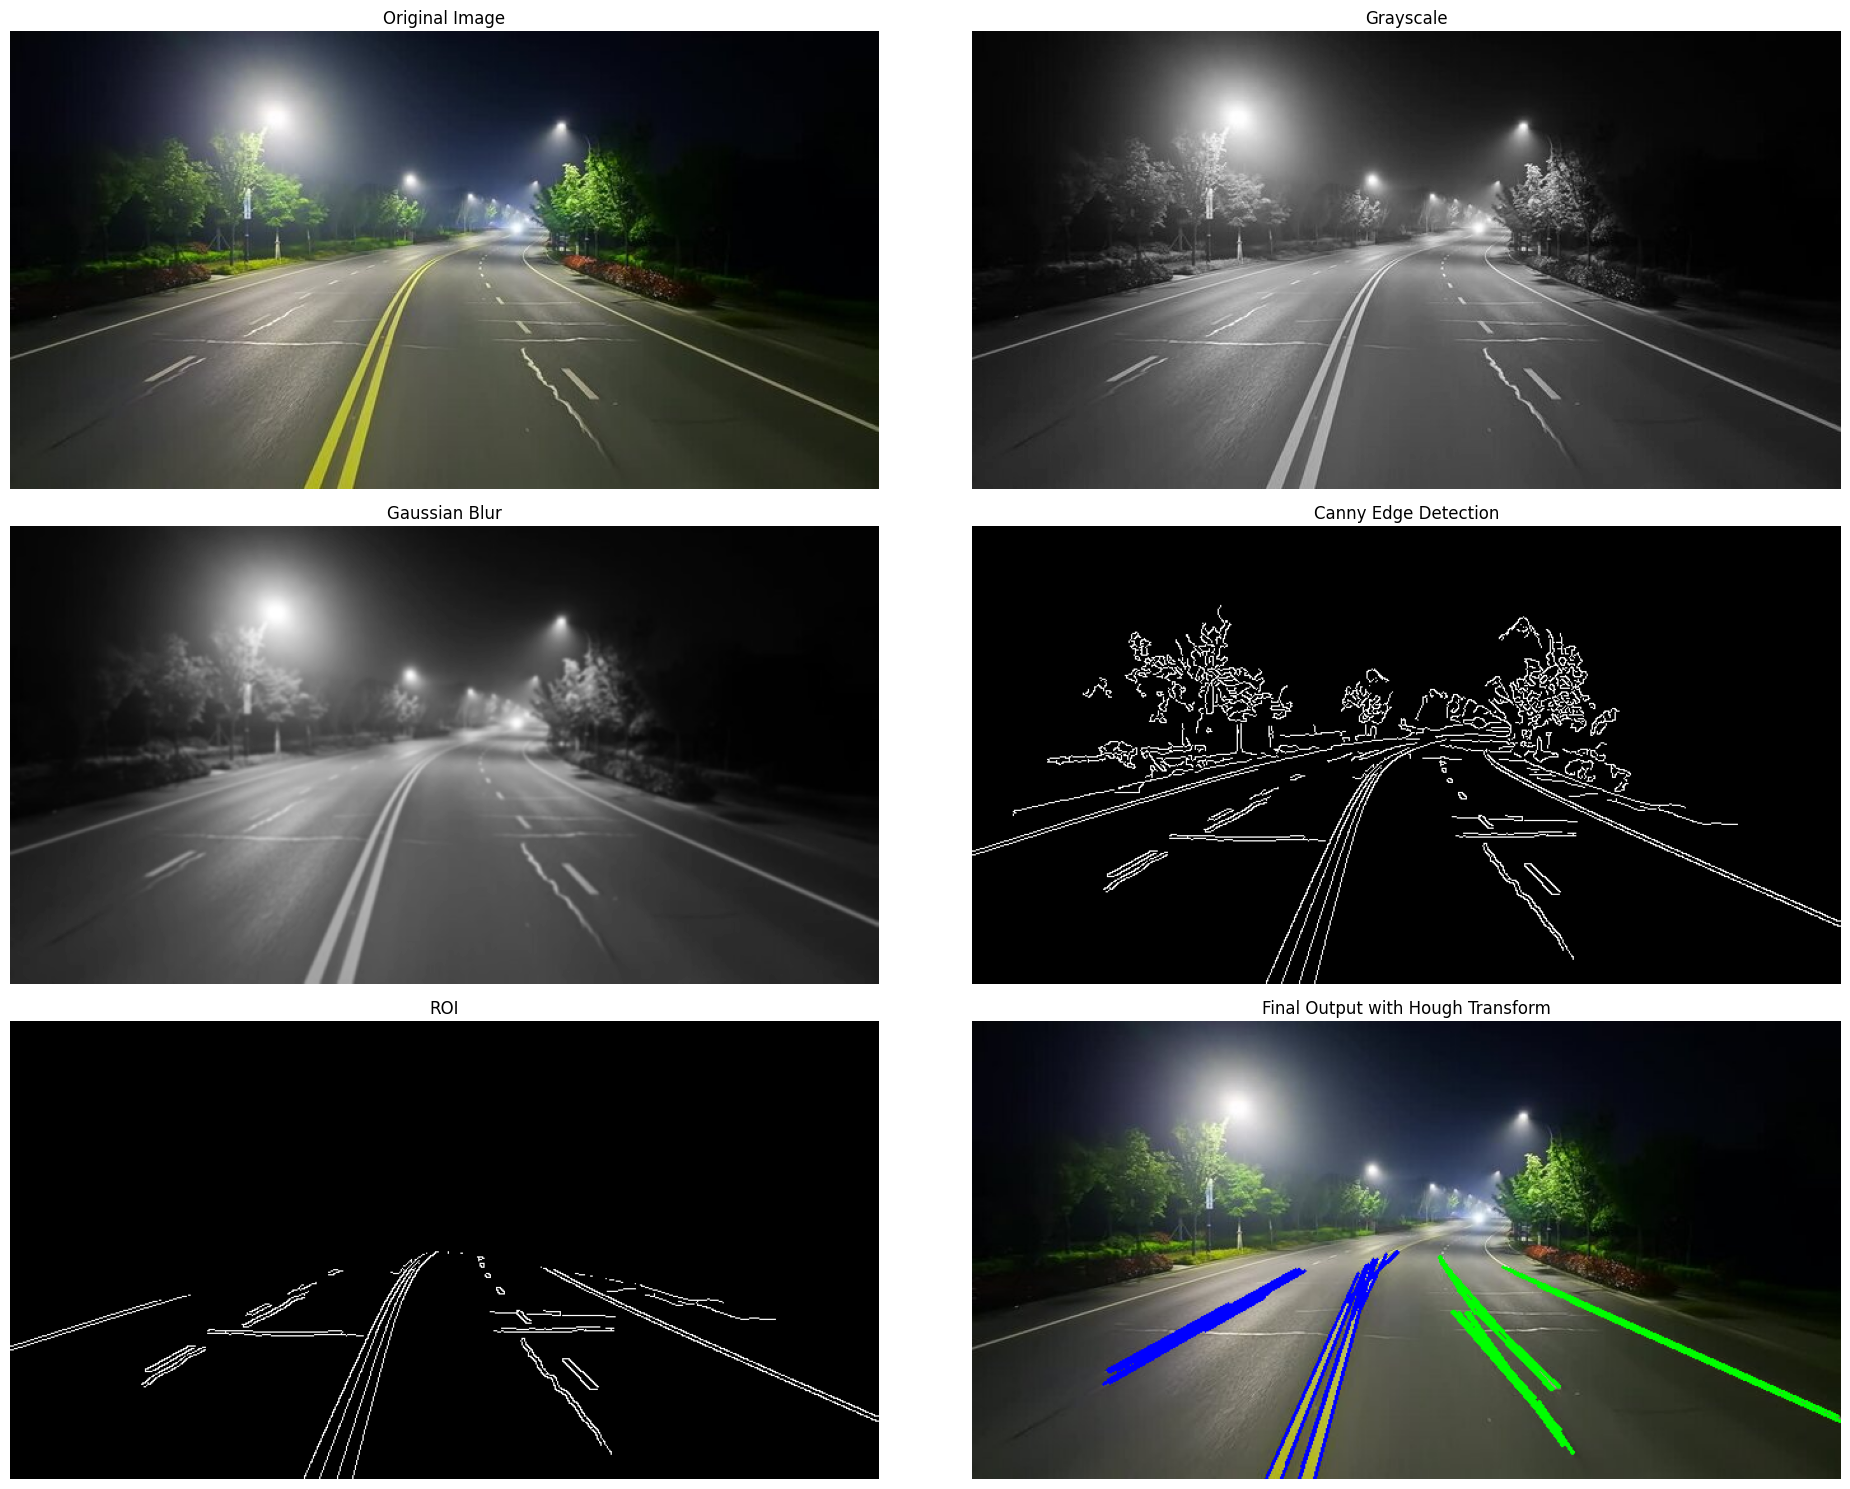

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def display_images(images, titles, rows=3, cols=2, cmap=None):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # 3 rows, 2 columns

    for ax, img, title in zip(axes.flat, images, titles):
        ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

image = cv2.imread('image9.jpg')

# image dimensions...
height = image.shape[0]
width = image.shape[1]
original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Image preprocessing...

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 2: canny edge detection...

edges = cv2.Canny(blurred, 30, 100, apertureSize=3)

# Step 3: define ROI...
points = np.array([
    [0, height], 
    [0, 2*height // 3], 
    [width // 2, height // 2],
    [width, 2*height // 3], 
    [width, height]
], np.int32)


# step 4: hough line transform..
mask = np.zeros_like(gray)
cv2.fillPoly(mask, [points], 255)
masked_edges = cv2.bitwise_and(edges, edges, mask=mask)

lines = cv2.HoughLinesP(
    masked_edges, 
    rho=1, 
    theta=np.pi / 180, 
    threshold=20, 
    minLineLength=20, 
    maxLineGap=40
)

output_image = image.copy()

if lines is not None:
    for points in lines:
        x1, y1, x2, y2 = points[0]
        if 2 * abs(x1 - x2) <= 5 * abs(y1 - y2):  
            if (x1 - x2) * (y1 - y2) >= 0:
                cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green line for positive slope
            elif (x1 - x2) * (y1 - y2) <= 0:
                cv2.line(output_image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue line for negative slope


final_output_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)


images_to_display = [
    original_rgb,  # Original Image
    gray,          # Grayscale
    blurred,       # Gaussian Blur
    edges,         # Canny Edge Detection
    masked_edges,          # ROI Mask
    final_output_rgb  # Final Output with Hough Transform
]

titles = [
    "Original Image",
    "Grayscale",
    "Gaussian Blur",
    "Canny Edge Detection",
    "ROI",
    "Final Output with Hough Transform"
]
# 3 rows and 2 columns
display_images(images_to_display, titles, rows=3, cols=2, cmap='gray')



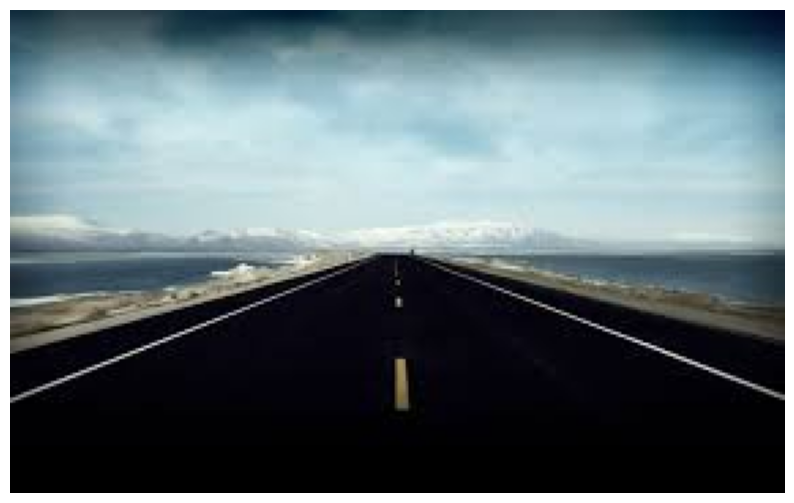

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('image4.jpg')

# image dimensions...
height = image.shape[0]
width = image.shape[1]


original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Image preprocessing...
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 2: canny edge detection...
edges = cv2.Canny(blurred, 30, 100, apertureSize=3)

# Step 3: define ROI...
points = np.array([
    [0, height], 
    [0, 2*height // 3], 
    [width // 2, height // 2],
    [width, 2*height // 3], 
    [width, height]
], np.int32)


# step 4: hough line transform..
mask = np.zeros_like(gray)
cv2.fillPoly(mask, [points], 255)
masked_edges = cv2.bitwise_and(edges, edges, mask=mask)

lines = cv2.HoughLinesP(
    masked_edges, 
    rho=1, 
    theta=np.pi / 180, 
    threshold=40, 
    minLineLength=20, 
    maxLineGap=40
)

output_image = image.copy()

if lines is not None:
    for points in lines:
        x1, y1, x2, y2 = points[0]
        if 2 * abs(x1 - x2) <= 5 * abs(y1 - y2):  # Condition for slope-based line detection
            if (x1 - x2) * (y1 - y2) >= 0:
                cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green line for positive slope
            elif (x1 - x2) * (y1 - y2) <= 0:
                cv2.line(output_image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue line for negative slope

# Convert the final output image to RGB for display
final_output_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Step 8: Display the final image
plt.figure(figsize=(10, 7))
plt.imshow(final_output_rgb)
# plt.title(" image")
plt.axis('off')
plt.show()


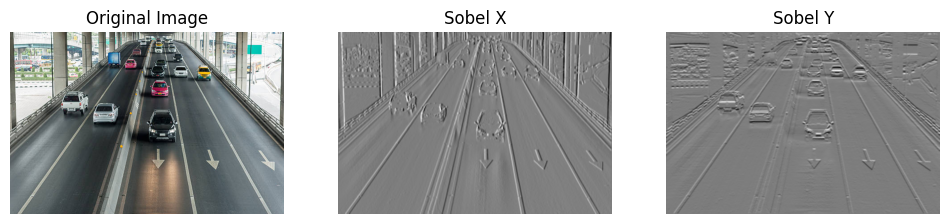

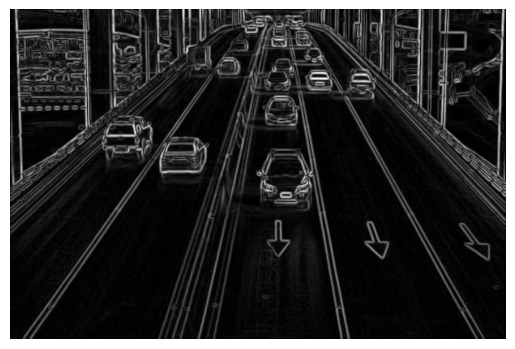

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the original image
image = cv2.imread('image10.jpg')

# Get image dimensions
height = image.shape[0]
width = image.shape[1]

# Step 1: Convert the original image to RGB for display
original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 4: Apply Sobel filter in both X and Y directions
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in the X direction
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in the Y direction

# Step 5: Combine the two gradients to get the total magnitude
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Step 6: Normalize the output to the range [0, 255] for visualization
sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX)

# Step 7: Display the original and Sobel-filtered images
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.figure()
plt.imshow(sobel_combined, cmap='gray')
# plt.title('Sobel Combined Magnitude')
plt.axis('off')

plt.show()


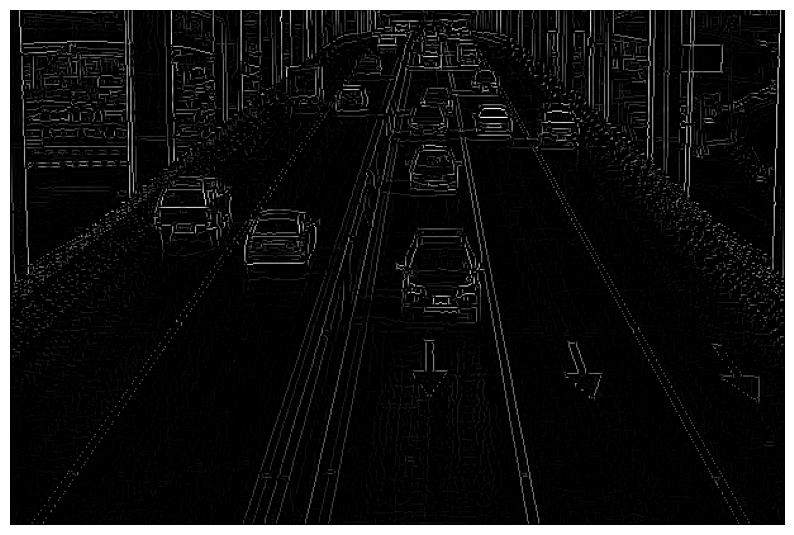

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_max_suppression(gradient_magnitude, gradient_direction):
    '''
    Perform Non-Maximum Suppression (NMS) on the gradient magnitude using the gradient direction.
    '''
    suppressed_img = np.zeros_like(gradient_magnitude)
    for x in range(1, gradient_magnitude.shape[0] - 1):
        for y in range(1, gradient_magnitude.shape[1] - 1):
            angle = gradient_direction[x, y]
            # Ensure angle is within 0 to 180 degrees
            angle = angle % 180

            # Neighbor indices based on gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                neighbor1 = gradient_magnitude[x, y + 1]
                neighbor2 = gradient_magnitude[x, y - 1]
            elif (22.5 <= angle < 67.5):
                neighbor1 = gradient_magnitude[x - 1, y + 1]
                neighbor2 = gradient_magnitude[x + 1, y - 1]
            elif (67.5 <= angle < 112.5):
                neighbor1 = gradient_magnitude[x - 1, y]
                neighbor2 = gradient_magnitude[x + 1, y]
            elif (112.5 <= angle < 157.5):
                neighbor1 = gradient_magnitude[x + 1, y + 1]
                neighbor2 = gradient_magnitude[x - 1, y - 1]

            # Suppress pixels that are not local maxima
            if gradient_magnitude[x, y] >= neighbor1 and gradient_magnitude[x, y] >= neighbor2:
                suppressed_img[x, y] = gradient_magnitude[x, y]
            else:
                suppressed_img[x, y] = 0
    return suppressed_img

# Read the original image
image = cv2.imread('image10.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Compute Sobel gradients in X and Y directions
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and direction
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x) * 180 / np.pi  # Convert to degrees

# Apply Non-Maximum Suppression
suppressed_img = non_max_suppression(gradient_magnitude, gradient_direction)

# Normalize the output to the range [0, 255]
suppressed_img_normalized = cv2.normalize(suppressed_img, None, 0, 255, cv2.NORM_MINMAX)

# Display the results
plt.figure(figsize=(10, 7))


plt.imshow(suppressed_img_normalized, cmap='gray')
# plt.title('Non-Maximum Suppressed Image')
plt.axis('off')

plt.show()


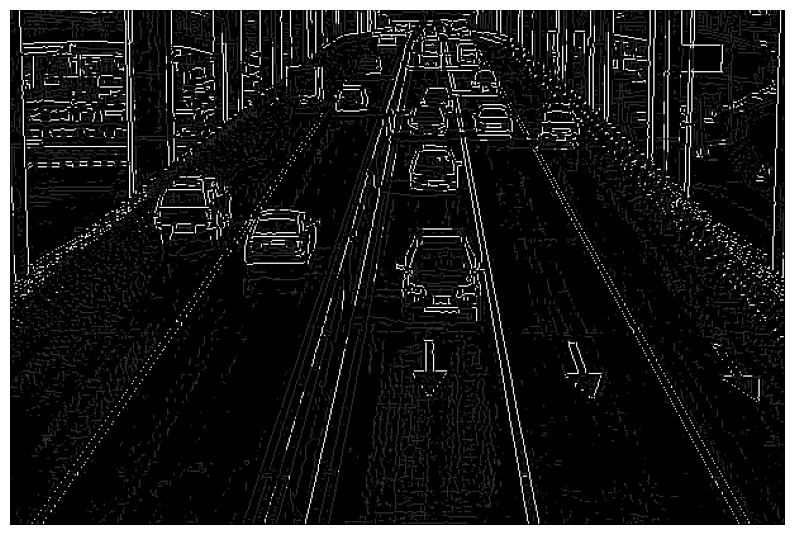

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_max_suppression(gradient_magnitude, gradient_direction):
    '''
    Perform Non-Maximum Suppression (NMS) on the gradient magnitude using the gradient direction.
    '''
    suppressed_img = np.zeros_like(gradient_magnitude)
    for x in range(1, gradient_magnitude.shape[0] - 1):
        for y in range(1, gradient_magnitude.shape[1] - 1):
            angle = gradient_direction[x, y]
            # Ensure angle is within 0 to 180 degrees
            angle = angle % 180

            # Neighbor indices based on gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                neighbor1 = gradient_magnitude[x, y + 1]
                neighbor2 = gradient_magnitude[x, y - 1]
            elif (22.5 <= angle < 67.5):
                neighbor1 = gradient_magnitude[x - 1, y + 1]
                neighbor2 = gradient_magnitude[x + 1, y - 1]
            elif (67.5 <= angle < 112.5):
                neighbor1 = gradient_magnitude[x - 1, y]
                neighbor2 = gradient_magnitude[x + 1, y]
            elif (112.5 <= angle < 157.5):
                neighbor1 = gradient_magnitude[x + 1, y + 1]
                neighbor2 = gradient_magnitude[x - 1, y - 1]

            # Suppress pixels that are not local maxima
            if gradient_magnitude[x, y] >= neighbor1 and gradient_magnitude[x, y] >= neighbor2:
                suppressed_img[x, y] = gradient_magnitude[x, y]
            else:
                suppressed_img[x, y] = 0
    return suppressed_img

def double_thresholding(gradient_magnitude, low_threshold_ratio=0.1, high_threshold_ratio=0.3):
    '''
    Apply double thresholding to categorize pixels into strong, weak, and non-edges.
    '''
    high_threshold = np.max(gradient_magnitude) * high_threshold_ratio
    low_threshold = high_threshold * low_threshold_ratio

    # Categorize pixels
    strong_edges = (gradient_magnitude >= high_threshold)
    weak_edges = (gradient_magnitude >= low_threshold) & (gradient_magnitude < high_threshold)

    # Initialize output image
    connected_edges = np.zeros_like(gradient_magnitude)

    # Set strong edges to 255
    connected_edges[strong_edges] = 255

    # Set weak edges to 50
    connected_edges[weak_edges] = 50

    return connected_edges

# Read the original image
image = cv2.imread('image10.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Compute Sobel gradients in X and Y directions
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and direction
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x) * 180 / np.pi  # Convert to degrees

# Apply Non-Maximum Suppression
suppressed_img = non_max_suppression(gradient_magnitude, gradient_direction)

# Apply Double Thresholding
final_edges = double_thresholding(suppressed_img)

# Display the results
plt.figure(figsize=(10, 7))
plt.imshow(final_edges, cmap='gray')
# plt.title('Double Thresholding Applied Image')
plt.axis('off')
plt.show()


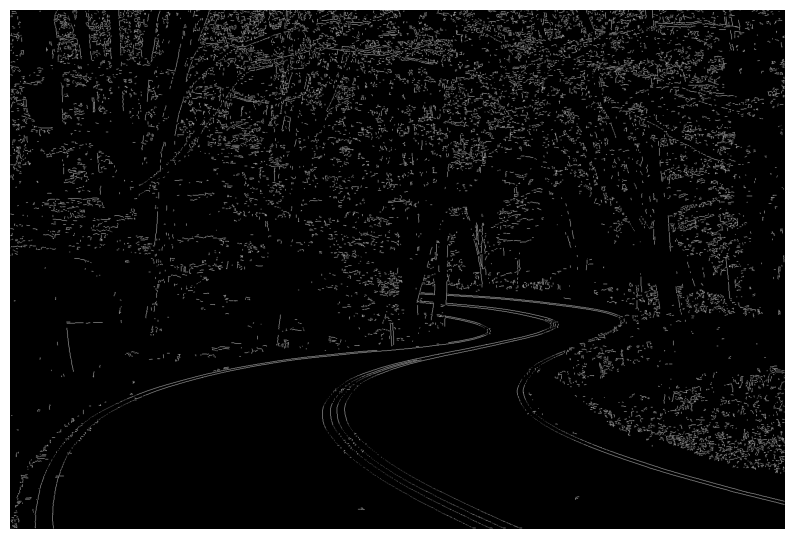

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_max_suppression(gradient_magnitude, gradient_direction):
    '''
    Perform Non-Maximum Suppression (NMS) on the gradient magnitude using the gradient direction.
    '''
    suppressed_img = np.zeros_like(gradient_magnitude)
    for x in range(1, gradient_magnitude.shape[0] - 1):
        for y in range(1, gradient_magnitude.shape[1] - 1):
            angle = gradient_direction[x, y]
            # Ensure angle is within 0 to 180 degrees
            angle = angle % 180

            # Neighbor indices based on gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                neighbor1 = gradient_magnitude[x, y + 1]
                neighbor2 = gradient_magnitude[x, y - 1]
            elif (22.5 <= angle < 67.5):
                neighbor1 = gradient_magnitude[x - 1, y + 1]
                neighbor2 = gradient_magnitude[x + 1, y - 1]
            elif (67.5 <= angle < 112.5):
                neighbor1 = gradient_magnitude[x - 1, y]
                neighbor2 = gradient_magnitude[x + 1, y]
            elif (112.5 <= angle < 157.5):
                neighbor1 = gradient_magnitude[x + 1, y + 1]
                neighbor2 = gradient_magnitude[x - 1, y - 1]

            # Suppress pixels that are not local maxima
            if gradient_magnitude[x, y] >= neighbor1 and gradient_magnitude[x, y] >= neighbor2:
                suppressed_img[x, y] = gradient_magnitude[x, y]
            else:
                suppressed_img[x, y] = 0
    return suppressed_img

def double_thresholding(gradient_magnitude, low_threshold_ratio=0.1, high_threshold_ratio=0.3):
    '''
    Apply double thresholding to categorize pixels into strong, weak, and non-edges.
    '''
    high_threshold = np.max(gradient_magnitude) * high_threshold_ratio
    low_threshold = high_threshold * low_threshold_ratio

    # Categorize pixels
    strong_edges = (gradient_magnitude >= high_threshold)
    weak_edges = (gradient_magnitude >= low_threshold) & (gradient_magnitude < high_threshold)

    # Initialize output image
    connected_edges = np.zeros_like(gradient_magnitude)

    # Set strong edges to 255
    connected_edges[strong_edges] = 255

    # Set weak edges to 50
    connected_edges[weak_edges] = 50

    return connected_edges

def hysteresis(connected_edges, weak_pixel_intensity=50, strong_pixel_intensity=255):
    '''
    Perform hysteresis to connect weak edges to strong edges and discard isolated weak edges.
    '''
    canny_img = connected_edges.copy()
    
    # Find coordinates of weak edges
    weak_edges_x, weak_edges_y = np.where(canny_img == weak_pixel_intensity)
    for x, y in zip(weak_edges_x, weak_edges_y):
        # If any neighbor of a weak edge is a strong edge, convert the weak edge to a strong edge
        if np.any(canny_img[x - 1:x + 2, y - 1:y + 2] == strong_pixel_intensity):
            canny_img[x, y] = strong_pixel_intensity
        else:
            canny_img[x, y] = 0  # Otherwise, discard the weak edge

    return canny_img

# Read the original image
image = cv2.imread('image6.webp')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Compute Sobel gradients in X and Y directions
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and direction
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x) * 180 / np.pi  # Convert to degrees

# Apply Non-Maximum Suppression
suppressed_img = non_max_suppression(gradient_magnitude, gradient_direction)

# Apply Double Thresholding
thresholded_img = double_thresholding(suppressed_img)

# Apply Hysteresis
edges = hysteresis(thresholded_img)




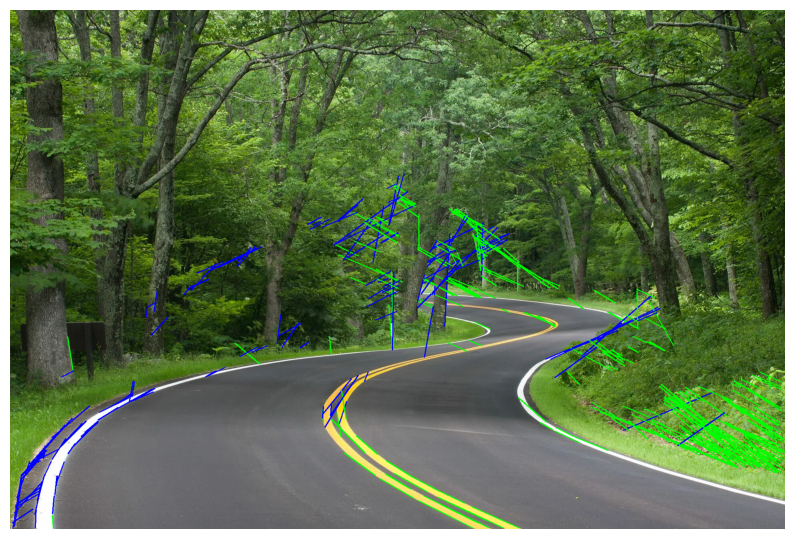

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_max_suppression(gradient_magnitude, gradient_direction):
    '''
    Perform Non-Maximum Suppression (NMS) on the gradient magnitude using the gradient direction.
    '''
    suppressed_img = np.zeros_like(gradient_magnitude)
    for x in range(1, gradient_magnitude.shape[0] - 1):
        for y in range(1, gradient_magnitude.shape[1] - 1):
            angle = gradient_direction[x, y]
            # Ensure angle is within 0 to 180 degrees
            angle = angle % 180

            # Neighbor indices based on gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                neighbor1 = gradient_magnitude[x, y + 1]
                neighbor2 = gradient_magnitude[x, y - 1]
            elif (22.5 <= angle < 67.5):
                neighbor1 = gradient_magnitude[x - 1, y + 1]
                neighbor2 = gradient_magnitude[x + 1, y - 1]
            elif (67.5 <= angle < 112.5):
                neighbor1 = gradient_magnitude[x - 1, y]
                neighbor2 = gradient_magnitude[x + 1, y]
            elif (112.5 <= angle < 157.5):
                neighbor1 = gradient_magnitude[x + 1, y + 1]
                neighbor2 = gradient_magnitude[x - 1, y - 1]

            # Suppress pixels that are not local maxima
            if gradient_magnitude[x, y] >= neighbor1 and gradient_magnitude[x, y] >= neighbor2:
                suppressed_img[x, y] = gradient_magnitude[x, y]
            else:
                suppressed_img[x, y] = 0
    return suppressed_img

def double_thresholding(gradient_magnitude, low_threshold_ratio=0.1, high_threshold_ratio=0.3):
    '''
    Apply double thresholding to categorize pixels into strong, weak, and non-edges.
    '''
    high_threshold = np.max(gradient_magnitude) * high_threshold_ratio
    low_threshold = high_threshold * low_threshold_ratio

    # Categorize pixels
    strong_edges = (gradient_magnitude >= high_threshold)
    weak_edges = (gradient_magnitude >= low_threshold) & (gradient_magnitude < high_threshold)

    # Initialize output image
    connected_edges = np.zeros_like(gradient_magnitude)

    # Set strong edges to 255
    connected_edges[strong_edges] = 255

    # Set weak edges to 50
    connected_edges[weak_edges] = 50

    return connected_edges

def hysteresis(connected_edges, weak_pixel_intensity=50, strong_pixel_intensity=255):
    '''
    Perform hysteresis to connect weak edges to strong edges and discard isolated weak edges.
    '''
    canny_img = connected_edges.copy()
    
    # Find coordinates of weak edges
    weak_edges_x, weak_edges_y = np.where(canny_img == weak_pixel_intensity)
    for x, y in zip(weak_edges_x, weak_edges_y):
        # If any neighbor of a weak edge is a strong edge, convert the weak edge to a strong edge
        if np.any(canny_img[x - 1:x + 2, y - 1:y + 2] == strong_pixel_intensity):
            canny_img[x, y] = strong_pixel_intensity
        else:
            canny_img[x, y] = 0  # Otherwise, discard the weak edge

    return canny_img

# Read the original image
image = cv2.imread('image6.webp')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Compute Sobel gradients in X and Y directions
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and direction
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x) * 180 / np.pi  # Convert to degrees

# Apply Non-Maximum Suppression
suppressed_img = non_max_suppression(gradient_magnitude, gradient_direction)

# Apply Double Thresholding
thresholded_img = double_thresholding(suppressed_img)

# Apply Hysteresis
edges = hysteresis(thresholded_img)
# Get the image height and width for defining the region of interest (ROI)
height, width = gray.shape

# Step 3: Define ROI as a trapezoidal region
points = np.array([
    [0, height], 
    [0, 2*height // 3], 
    [width // 2, height // 3],
    [width, 2*height // 3], 
    [width, height]
], np.int32)

# Step 4: Create a mask and apply bitwise_and with the edges
mask = np.zeros_like(gray)
cv2.fillPoly(mask, [points], 255)

# Write the coordinate labels on the mask
cv2.putText(mask, '0, h', (10, height - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (128), 2)  # Point (0, h)
cv2.putText(mask, 'w, h', (width - 100, height - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (128), 2)  # Point (w, h)
cv2.putText(mask, '0, 2*h/3', (10, 2*height // 3 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (128), 2)  # Point (0, 2h/3)
cv2.putText(mask, 'w, 2*h/3', (width - 120, 2*height // 3 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (128), 2)  # Point (w, 2h/3)
cv2.putText(mask, 'w/2, h/2', (width // 2 - 70, height // 3 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (128), 2)  # Point (w/2, h/3)
# Convert edges to 8-bit binary image (0 and 255)
edges_8bit = np.uint8(edges)

# Apply the mask with bitwise_and
masked_edges = cv2.bitwise_and(edges_8bit, edges_8bit, mask=mask)

# Step 5: Hough Line Transform to detect lines
lines = cv2.HoughLinesP(
    masked_edges, 
    rho=1, 
    theta=np.pi / 180, 
    threshold=20, 
    minLineLength=20, 
    maxLineGap=40
)

# Create a copy of the original image to draw lines on
output_image = image.copy()

# Step 6: Draw detected lines on the output image
if lines is not None:
    for points in lines:
        x1, y1, x2, y2 = points[0]
        # Condition for slope-based line detection (remove near-horizontal lines)
        if abs(y2 - y1) > abs(x2 - x1) * 2 / 5:  # Adjusted condition for slope
            # Color lines with positive and negative slopes differently
            if (x1 - x2) * (y1 - y2) >= 0:
                cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green for positive slope
            else:
                cv2.line(output_image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue for negative slope

# Convert the final output image to RGB for display with matplotlib
final_output_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Step 7: Display the final image using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(final_output_rgb, cmap='gray')
plt.axis('off')  # Remove axis labels for a clean display
plt.show()
